# **Bayesian Radioactive Decay Inference (2D Grid)**

This notebook visualize the simplified radioactive decay problem in Homework 3.

## Enable Autoreload

Enabling autoreload make debugging much easier.
However, there is a bug in `ipython 9` that makes autoreload fail.
Hence, we will use a exception to try enabling autoreload.

In [1]:
try:
    %load_ext autoreload
    %autoreload 2
except ModuleNotFoundError as e:
    print(e)
    print("Probably bug from ipython.")
    print("Relaunch kernels after editing codes, or downgrade your ipython/jupyterlab.")

## Load Python Package

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from numpy import trapezoid

In [ ]:
! pip install -e .. # Install the homework package if needed

In [3]:
from phys305_hw3 import *

## Set up the Test Case

In [4]:
# Fix random seed for reproducibility

np.random.seed(42)

In [5]:
# Parameter

n0    = 100
lmbda = 0.01

In [6]:
# Sampling Time

ts = np.linspace(0, 100, 11)
dt = 10

## Test Codes in "a1.py"

In [7]:
groundtruth = n0, lmbda

Cts     = count (ts, dt, groundtruth)
Cts_obs = sample(ts, dt, groundtruth)

print("Times           :", ts)
print("Expected counts :", Cts)
print("Observed counts :", Cts_obs)

Times           : [  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
Expected counts : [10.51709181  9.5162582   8.6106665   7.79125324  7.04981746  6.37893863
  5.77190236  5.22263323  4.72563397  4.27593044  3.86902186]
Observed counts : [13  6  8  7  4  7  4 10  1  4  3]


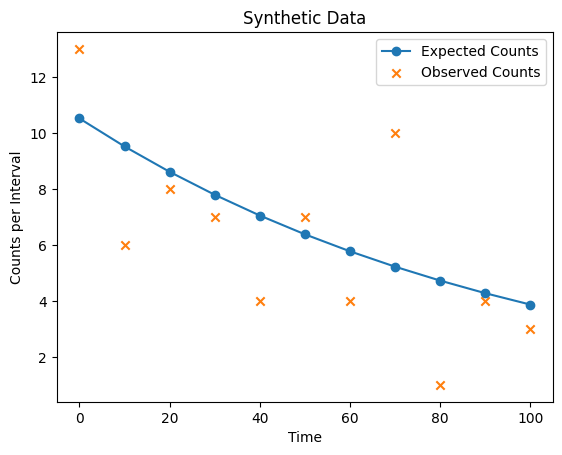

In [8]:
plt.plot   (ts, Cts,            'o-', color='C0', label="Expected Counts")
plt.scatter(ts, Cts_obs, marker='x',  color='C1', label="Observed Counts")

plt.xlabel("Time")
plt.ylabel("Counts per Interval")
plt.title("Synthetic Data")
plt.legend()

## Test Codes in "a2.py"

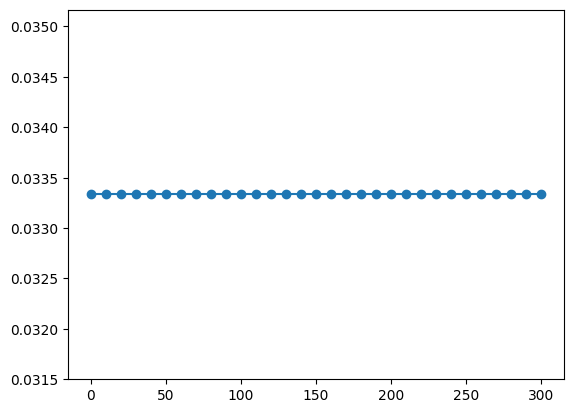

In [9]:
# Save prior of n0 on a grid and plot it

n0s, ps_n0 = prior0_n0(0, 300, 31)
plt.plot(n0s, ps_n0, 'o-')

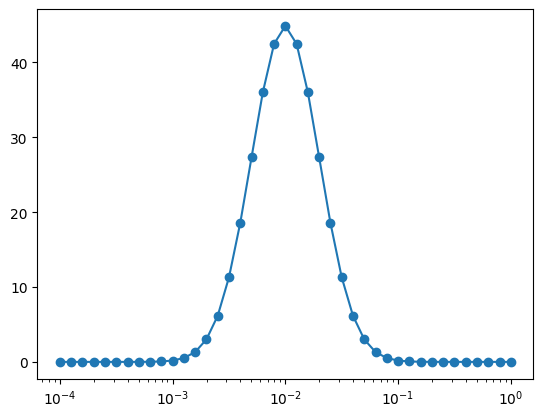

In [10]:
# Save prior of lmbda on a grid and plot it

lmbdas, ps_lmbda = prior0_lmbda(1e-4, 1, 41)
plt.semilogx(lmbdas, ps_lmbda, 'o-')

In [11]:
# Look at the shape and dimensions of these grids

print(n0s.shape)
print(lmbdas.shape)

(31,)
(41,)


In [12]:
# When we need to create 2D grid, it is useful to learn the `np.meshgrid()` function.
# Use it and check the array dimensions.

params = np.meshgrid(n0s, lmbdas)

n0ss, lmbdass = params
print(n0ss.shape)
print(lmbdass.shape)

(41, 31)
(41, 31)


In [13]:
# It is also useful to learn numpy broadcasting:
#   https://numpy.org/doc/stable/user/basics.broadcasting.html
# and the np.newaxis syntax.
# The follow example ensures `prior` has same dimensions as `n0ss` and `lmbdass`.

prior = ps_n0[np.newaxis,:] * ps_lmbda[:,np.newaxis]
print(prior.shape)

(41, 31)


Text(0, 0.5, '$\\lambda$')

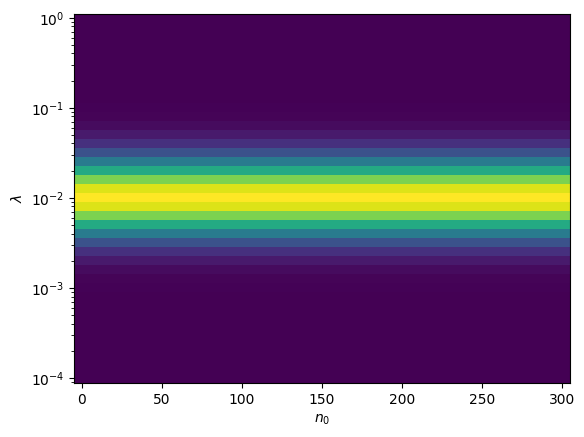

In [14]:
plt.pcolormesh(n0s, lmbdas, prior)
plt.yscale('log')
plt.xlabel(r'$n_0$')
plt.ylabel(r'$\lambda$')

## Test Codes in "a3.py"

In [15]:
# We package the counts, times, and dt into a tuple "obs"
obs  = Cts, ts, dt

# And then we can compute the likelihood on the grid params
like = likelihood(obs, params)

/Users/ckc/Volumes/Local/Books/hw3/src/phys305_hw3/a3.py:8: RuntimeWarning: divide by zero encountered in log
  return k * log(lmbda) - lmbda - loggamma(k+1)


Text(0, 0.5, '$\\lambda$')

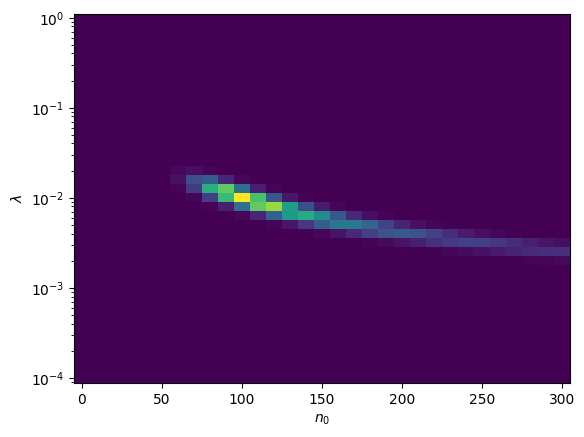

In [16]:
# Visualize the likelihood

plt.pcolormesh(n0s, lmbdas, like)
plt.yscale('log')
plt.xlabel(r'$n_0$')
plt.ylabel(r'$\lambda$')

## Test Codes in "a4.py"

In [17]:
# Compute the posterior

post = posterior(obs, prior, params)

Text(0, 0.5, '$\\lambda$')

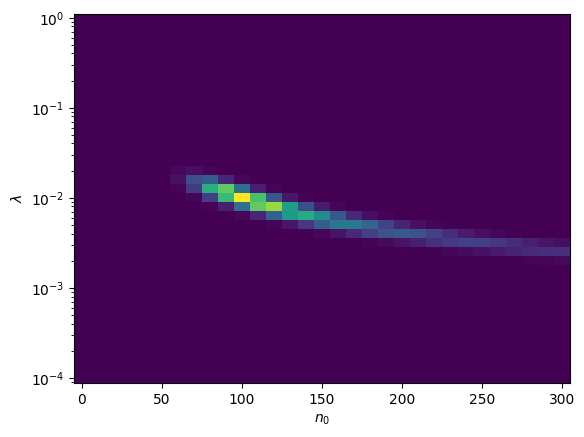

In [18]:
# Visualize the posterior

plt.pcolormesh(n0s, lmbdas, like)
plt.yscale('log')
plt.xlabel(r'$n_0$')
plt.ylabel(r'$\lambda$')

In [19]:
# Use trapezoid2() to ensure that the posterior is normalized

print(trapezoid2(post, params))

0.9999999999999999


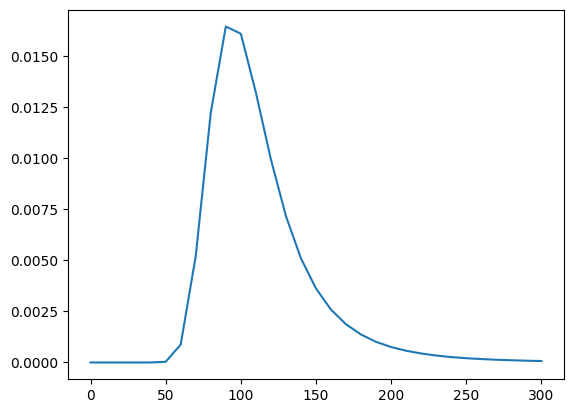

In [20]:
# We may integrate the posterior along different dimension

ps_n0 = trapezoidy(post, params)
plt.plot(n0s, ps_n0)

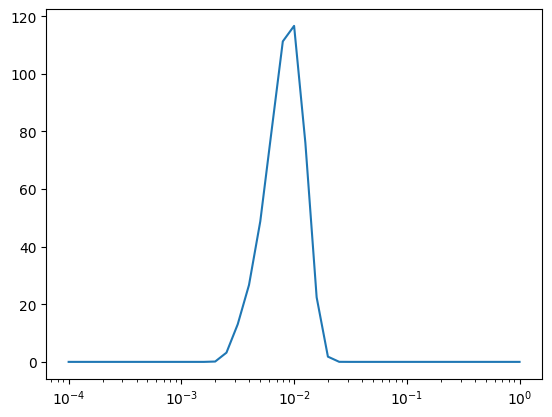

In [21]:
# We may integrate the posterior along different dimension

ps_lmbda = trapezoidx(post, params)
plt.semilogx(lmbdas, ps_lmbda)

## Test Codes in "a5.py"

In [22]:
# Run the numerical experiment

posts, params = runexpr(n_expr=10)

In [23]:
# Define the 1D grids

n0s    = params[0][0,:]
lmbdas = params[1][:,0]

Text(0, 0.5, '$\\lambda$')

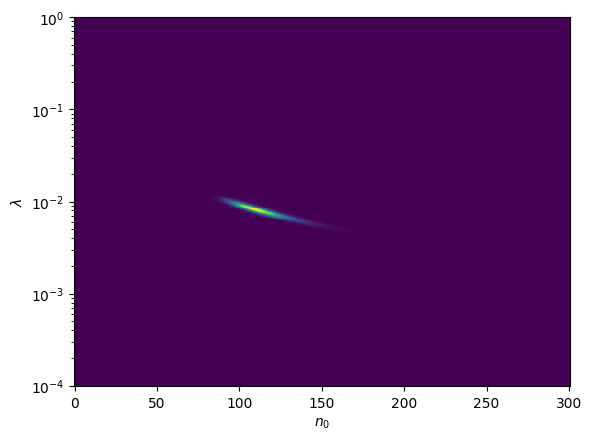

In [24]:
# Visualize the posterior

plt.pcolormesh(n0s, lmbdas, posts[-1])
plt.yscale('log')
plt.xlabel(r'$n_0$')
plt.ylabel(r'$\lambda$')

mu = 0.020558; sigma2 = 2.6069e-04
mu = 0.008733; sigma2 = 6.2564e-06
mu = 0.009465; sigma2 = 3.4465e-06
mu = 0.008331; sigma2 = 2.3228e-06
mu = 0.008825; sigma2 = 1.8238e-06
mu = 0.008154; sigma2 = 1.4172e-06


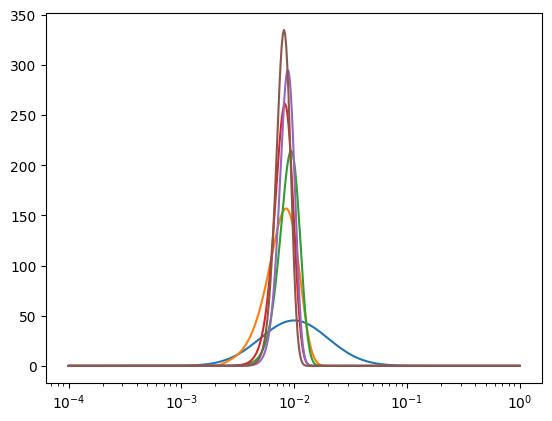

In [25]:
# Visualize and compute the expectation values of lmbdas

for post in posts[::2]:
    ps_lmbda = trapezoidx(post, params)
    plt.semilogx(lmbdas, ps_lmbda)

    lmbda  = trapezoid(ps_lmbda *  lmbdas,           lmbdas)
    sigma2 = trapezoid(ps_lmbda * (lmbdas-lmbda)**2, lmbdas)
    
    print(f'mu = {lmbda:.6f}; sigma2 = {sigma2:.4e}')